In [285]:
import numpy as np
import pandas as pd

### Общий вид таблицы

In [286]:
train = pd.read_csv('train.csv')
train.head(10)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


### Статистика по всем показателям

In [287]:
stat = train.describe().round(2)
stat.loc[['count','min','max','mean'],:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00,10000.0,10000.00,10000.00,7887.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,5202.0,10000.00,10000.00,10000.00
min,0.00,0.0,0.00,1.14,0.37,0.00,1.00,0.00,1910.00,0.00,0.00,168.00,0.00,0.0,0.00,0.00,59174.78
max,16798.00,209.0,19.00,641.07,7480.59,2014.00,42.00,117.00,20052011.00,0.52,74.00,19083.00,141.00,4849.0,6.00,23.00,633233.47
mean,8383.41,50.4,1.89,56.32,37.20,6.27,8.53,12.61,3990.17,0.12,24.69,5352.16,8.04,1142.9,1.32,4.23,214138.86


Всего в таблице 10000 записей. Id - идут не по порядку (от 0 до 16798). Районов всего 205. Максимальное количество комнат 19 (в квартирах есть ноль комнат). Максимальная площадь 641. Максимальная жилая площадь - 7480(аномалия). Максимальная площадь кухни -2014(аномалия). По этажам нет аномалий. (1-42) Этажей в доме(0 - не может быть - аномалия). Год постройки - проверить на наличие ошибок. По остальным признакам аномалий не наблюдаю. Значени NaN в столбцах LifeSquare и Healthcare_1.

### Исследование признаков

####  id района

In [288]:
train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
196      1
117      1
205      1
199      1
207      1
Name: DistrictId, Length: 205, dtype: int64

##### Вывод:
По Id району аномалий нет. Id от 1 до 209. Всего уникальных 205 районов.

#### Количество комнат

In [289]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

##### Вывод:
В признаке Rooms есть ошибки. 19 и 10 комнат ошибочные данные, т. к. их площади не соответствуют количеству комнат. Так же в квартирах с 4, 5 и 6 комнатами слишком маленькие площади для такого количества комнат.

#### Площадь квартиры

In [290]:
train.nlargest(10, 'Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9229,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
726,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
7010,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1776,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
9307,4249,23,5.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,NaN,0,0,B,345665.209100
1606,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,NaN,2,6,B,338644.075979
8011,3233,129,4.0,186.692602,87.487080,32.0,3,3.0,2011,0.020741,B,B,24,5613,5,1340.0,2,5,B,423443.464367
2790,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,1340.0,2,5,B,340273.238253


In [291]:
df2 = train.sort_values(by='Square')
df2['Square'] = df2['Square'].astype(int)
df2.head(15)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7470,14786,1,1.0,1,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
4496,15744,34,1.0,1,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
9869,3224,27,0.0,2,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
8572,10202,6,1.0,2,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
161,6782,45,1.0,2,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
8805,10527,27,1.0,4,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
328,4504,27,3.0,4,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
4800,7657,38,1.0,4,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
5009,11526,27,1.0,4,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
9067,13265,1,3.0,4,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


##### Вывод:
2 квартиры с подозрительно большими площадьми. Одна  площадью - 604 (имеет 2 комнаты и кухню площадью 1. год постройки 1977), вторая - площадь 641 (2 комнаты жилая - 638, кухня - 10, этаж 20 из 19). 13 квартир имеют площадь < 5,5 . Следующая квартира имеет площадь 13,8.

#### Жилая площадь

In [292]:
train.nlargest(10, 'LifeSquare')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8000,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
9229,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
5183,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
7010,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
357,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1776,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
5283,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
8872,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,200800.673767


In [293]:
df3 = train.sort_values(by='LifeSquare')
df3.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3113,13491,0,1.0,38.178277,0.370619,0.0,19,17.0,2016,0.006076,B,B,30,5285,0,645.0,6,6,B,105134.286994
1829,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
119,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,174741.998061
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6882,15402,27,2.0,58.521098,1.049867,1.0,4,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,142393.084641
8730,12198,6,1.0,41.939733,1.071193,1.0,12,17.0,2019,0.243205,B,B,5,1564,0,540.0,0,0,B,127233.289627
2687,6631,85,1.0,48.990533,1.104689,1.0,5,17.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,124761.832592
7626,12245,23,2.0,67.032994,1.139667,1.0,3,17.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,185006.418232
3917,8044,45,2.0,62.777104,1.141118,1.0,10,17.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,332118.521912
9247,10930,9,2.0,65.568381,1.150046,1.0,6,1.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187858.706484


##### Вывод:
Аномально большая жилая площадь одной из квартир- 7480, есть квартиры где жилая площадь больше площади квартиры. Очень много квартир с аномально низкой жилой площадью < 5. Имеются незаполненные данные.

#### Площадь кухни

In [294]:
train['KitchenSquare'].unique()
df4 = train.sort_values(by='KitchenSquare')
df4['KitchenSquare'] = df4['KitchenSquare'].astype(int)
df4.query('KitchenSquare > 100')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7733,12552,58,3.0,116.405693,113.109653,112,3,3.0,2016,0.437885,B,B,23,5735,3,1084.0,0,5,B,296165.936689
5002,7441,62,3.0,114.734473,112.589083,112,3,3.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,315245.521059
286,2737,27,3.0,123.430072,125.806981,123,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
6505,14679,81,1.0,32.276663,19.278394,1970,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
9520,14656,62,1.0,47.100719,46.447960,2014,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207


##### Вывод:
Много значений площади кухни равных - 1 и 0. Есть две аномалии - 2014, 1970. Большие площади кухни (> 100) занимают большую часть квартиры.

#### Этаж

In [295]:
train['Floor'].nunique()

33

##### Вывод:
Этажи с 1 по 42. 33 уникальных. Аномалий нет.

#### Этажность дома

In [296]:
train['HouseFloor'].nunique()

44

##### Вывод:
Этажность дома от 0 до 117. Всего 44 уникальных. Что делать с 0 этажом?

#### Год постройки

In [297]:
train['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [298]:
train.query('HouseYear > 2020')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


##### Вывод:
Года постройки с 1910 до 2020. Аномальные значения - 4968, 20052011.

#### Ecology_1

In [299]:
train['Ecology_1'].value_counts()

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
           ... 
0.386772      6
0.011320      3
0.394094      2
0.014334      1
0.012522      1
Name: Ecology_1, Length: 129, dtype: int64

##### Вывод:
Имеются нулевые значения(537). Всего 129 уникальных от 0 до 0.52

#### Ecology_2

In [300]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

##### Вывод:
Уникальных 2 значения (A, B)

#### Ecology_3

In [301]:
train['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

##### Вывод:
Уникальных 2 значения (A, B)

#### Social_1

In [302]:
train['Social_1'].unique()

array([11, 30, 33,  1, 35, 24, 37,  5, 42, 43,  8, 53, 46, 26, 23, 19,  2,
       38, 50, 15,  6,  4, 25,  0, 21, 66, 52, 20, 28, 36, 16, 49, 27,  9,
       41, 47, 39, 22, 18, 32, 34, 14, 31, 13, 17, 74, 29, 10, 12,  3,  7],
      dtype=int64)

##### Вывод:
Имеются нулевые значения(201). Диапазон от 0 до 74.

#### Social_2

In [303]:
train['Social_2'].unique()

array([ 3097,  6207,  5261,   264,  8667,  5776,  4860,  7687,  1564,
        9292,  8429, 10621,  5288,  1497, 14892,  9515,  4439,  5212,
        3889,  5067,  3806,   629,  4788, 12238,   388,   475,  2787,
        3975,  1437,   915,  7976,  5648,   168,  4231, 10573,  5613,
        6856, 11217,  2738,  7287,  7077,  4635,  3856,  7538,  4756,
        5731, 10055,  2748,  5469,   469,  3433, 11395, 10309,  5992,
       10311,  7960,  5664,  3293,  1892,  6558,  8004,  5487,  1952,
        6714, 10418, 11319,  6398,  7651,  3893,  4048,  3374,  4789,
        3746,  6533,  5889,  7759,  7425,  4346,  4378,  2940,  7715,
        1227,  5735,  7065,  7614,  4386,  5285,  5569,  6748,  2514,
        6564, 13670,  3478,  6119,  3379,  2423,  4798, 19083,  4017,
        8647,  1986,  4472,  3369,  2733,  6783,  5011,  4583,  2370,
        3151,  4724,  5027,  7010,  6566,  5148,  6141,  3594,  6746,
        6149,  2277,  2398,  3079,  2270,  5562,  1768,  6137,  5048,
        2810,   662,

##### Вывод:
Диапазон значений 168 - 19083. Аномалий нет.

#### Social_3

In [304]:
train['Social_3'].unique()

array([  0,   1,   2,  11,   3,   5,   4,   6,   8,  14,  84,  20,  56,
        10,  87,  16,  48,   7,   9, 141,  27,  45,  93,  19,  24,  59,
        23,  73,  39,  37], dtype=int64)

##### Вывод:
Имеются нулевые значения(2997 - самое большое). Диапазон от 0 до 141. 141 - возможно аномалия, но таких значений 245.

#### Healthcare_1

In [305]:
train['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

##### Вывод:
Имеются пропуски и одно нулевое значение. В остальном замечаний нет.

#### Healthcare_2

In [306]:
train['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

##### Вывод:
Целые значения от 0 до 6. Пропусков нет

#### Shops_1

In [307]:
train['Shops_1'].value_counts()

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

##### Вывод:
Целые значения от 0 до 19. Пропусков нет

#### Shops_2

In [308]:
train['Shops_2'].unique()

array(['B', 'A'], dtype=object)

##### Вывод:
Уникальных 2 значения (A, B)

### Price

In [309]:
train['Price'].max()

633233.4665699474

In [310]:
train['Price'].min()

59174.77802758122

##### Вывод:
Цены квартир от 59174 до 633233. Пропусков нет

### Задание к уроку 2(4)

In [311]:
import matplotlib.pyplot as plt

In [312]:
%matplotlib inline
%config InlineBackend.figure_format='svg'


(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <BarContainer object of 20 artists>)

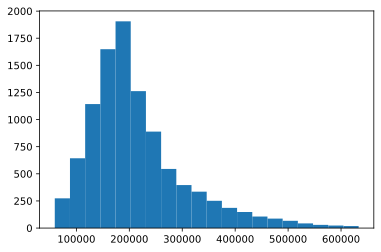

In [313]:
plt.hist(train['Price'], bins=20)


##### Вывод:
Больше всего квартир с ценой примерно 200000

### Гистограммы признаков

(array([8.000e+00, 3.705e+03, 3.880e+03, 2.235e+03, 1.500e+02, 1.800e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <BarContainer object of 20 artists>)

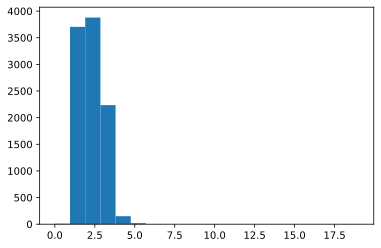

In [314]:
plt.hist(train['Rooms'], bins=20)

##### Вывод:
Можно отбросить значения где комнат >6.

#### Для создания матрицы корреляции я решил удалить некорректные данные и пропуски

In [315]:
#Создадим новый файл для корректных данных
train1 = train.copy()

In [316]:
#Удалим строки где комнат больше 5 и равны 0
train1 = train1.drop(train1[train1.Rooms > 5].index)
train1 = train1.drop(train1[train1.Rooms == 0].index)


(array([2.600e+01, 3.161e+03, 4.163e+03, 2.078e+03, 4.200e+02, 9.800e+01,
        2.800e+01, 1.400e+01, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  1.13685878,  22.46780324,  43.79874771,  65.12969217,
         86.46063664, 107.79158111, 129.12252557, 150.45347004,
        171.7844145 , 193.11535897, 214.44630343, 235.7772479 ,
        257.10819236, 278.43913683, 299.7700813 , 321.10102576,
        342.43197023, 363.76291469, 385.09385916, 406.42480362,
        427.75574809, 449.08669256, 470.41763702, 491.74858149,
        513.07952595, 534.41047042, 555.74141488, 577.07235935,
        598.40330381, 619.73424828, 641.06519275]),
 <BarContainer object of 30 artists>)

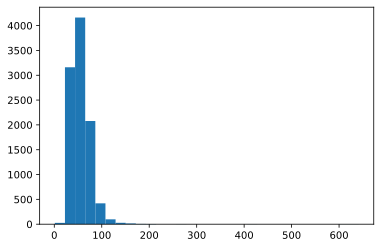

In [317]:
plt.hist(train['Square'], bins=30)

##### Вывод:
Можно отбросить значения площади >200 и <20.

In [318]:
#Удалим строки где Площадь больше 200 и меньше 20
train1 = train1.drop(train1[train1.Square > 200].index)
train1 = train1.drop(train1[train1.Square < 20].index)

(array([7.883e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.70619419e-01, 3.74381695e+02, 7.48392770e+02, 1.12240385e+03,
        1.49641492e+03, 1.87042600e+03, 2.24443707e+03, 2.61844815e+03,
        2.99245922e+03, 3.36647030e+03, 3.74048137e+03, 4.11449245e+03,
        4.48850353e+03, 4.86251460e+03, 5.23652568e+03, 5.61053675e+03,
        5.98454783e+03, 6.35855890e+03, 6.73256998e+03, 7.10658105e+03,
        7.48059213e+03]),
 <BarContainer object of 20 artists>)

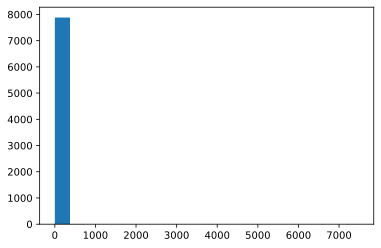

In [319]:
plt.hist(train['LifeSquare'], bins=20)

##### Вывод:
Есть аномальные данные мешающие воприятию гистограммы. Можно отбросить значения площади >200 и <15.

In [320]:
#Удалим строки где жилая площадь больше 200 и < 15
train1 = train1.drop(train1[train1.LifeSquare > 200].index)
train1 = train1.drop(train1[train1.LifeSquare < 15].index)

(array([1.776e+03, 1.385e+03, 1.663e+03, 1.173e+03, 7.580e+02, 3.070e+02,
        2.100e+02, 1.210e+02, 1.110e+02, 3.800e+01, 3.200e+01, 1.500e+01,
        8.000e+00, 9.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 2.000e+00]),
 array([ 15.00123434,  22.99302672,  30.98481911,  38.97661149,
         46.96840388,  54.96019626,  62.95198865,  70.94378103,
         78.93557342,  86.92736581,  94.91915819, 102.91095058,
        110.90274296, 118.89453535, 126.88632773, 134.87812012,
        142.8699125 , 150.86170489, 158.85349728, 166.84528966,
        174.83708205]),
 <BarContainer object of 20 artists>)

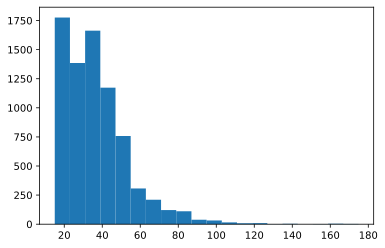

In [321]:
# Повторим гистограмму по признаку жилой площади
plt.hist(train1['LifeSquare'], bins=20)

(array([9.995e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([   0. ,  100.7,  201.4,  302.1,  402.8,  503.5,  604.2,  704.9,
         805.6,  906.3, 1007. , 1107.7, 1208.4, 1309.1, 1409.8, 1510.5,
        1611.2, 1711.9, 1812.6, 1913.3, 2014. ]),
 <BarContainer object of 20 artists>)

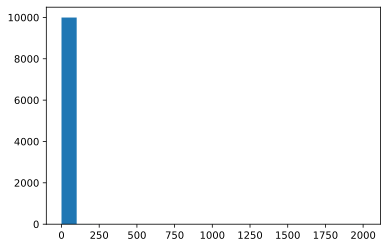

In [322]:
plt.hist(train['KitchenSquare'], bins=20)

##### Вывод:
Можно отбросить значения площади кухни >80 и <5.

In [323]:
#Удалим строки где площадь кухни больше 100
train1 = train1.drop(train1[train1.KitchenSquare > 80].index)
train1 = train1.drop(train1[train1.KitchenSquare < 5].index)

#### Год постройки

In [324]:
#Удалим строки где год постройки больше 2020
train1 = train1.drop(train1[train1.HouseYear > 2020].index)

(array([  4.,  10.,   0.,  12.,  23.,  18.,   3.,  31., 179., 645., 957.,
        803., 979., 455., 433., 318., 436., 459., 500., 455.]),
 array([1910. , 1915.5, 1921. , 1926.5, 1932. , 1937.5, 1943. , 1948.5,
        1954. , 1959.5, 1965. , 1970.5, 1976. , 1981.5, 1987. , 1992.5,
        1998. , 2003.5, 2009. , 2014.5, 2020. ]),
 <BarContainer object of 20 artists>)

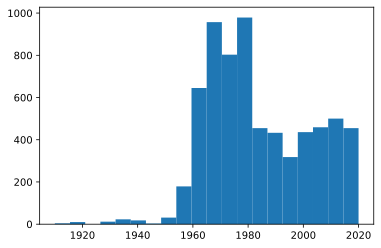

In [325]:
plt.hist(train1['HouseYear'], bins=20)

##### Вывод:
Отбросив значения где год >2020, получили наглядную гистограмму, которая показывает максимальное число домом построенных в 1970-е.

##### Тут я заменяю пропущенные значения на средние по группе кол-ва комнат 
(к сожалению, не нашел как это делается умнее, поэтому так)

In [326]:
mean_ls = train1.groupby('Rooms')['LifeSquare'].mean()

In [327]:
mean_r1 = mean_ls[1]
mean_r2 = mean_ls[2]
mean_r3 = mean_ls[3]
mean_r4 = mean_ls[4]
mean_r5 = mean_ls[5]

In [328]:
train1.loc[(train1['Rooms'] == 1) & (train1['LifeSquare'].isna()), 'LifeSquare'] = mean_r1
train1.loc[(train1['Rooms'] == 2) & (train1['LifeSquare'].isna()), 'LifeSquare'] = mean_r2
train1.loc[(train1['Rooms'] == 3) & (train1['LifeSquare'].isna()), 'LifeSquare'] = mean_r3
train1.loc[(train1['Rooms'] == 4) & (train1['LifeSquare'].isna()), 'LifeSquare'] = mean_r4
train1.loc[(train1['Rooms'] == 5) & (train1['LifeSquare'].isna()), 'LifeSquare'] = mean_r5

In [329]:
mean_healthcare_1 = train1['Healthcare_1'].mean()
train1['Healthcare_1'] = train1['Healthcare_1'].fillna(mean_healthcare_1)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6720 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             6720 non-null   int64  
 1   DistrictId     6720 non-null   int64  
 2   Rooms          6720 non-null   float64
 3   Square         6720 non-null   float64
 4   LifeSquare     6720 non-null   float64
 5   KitchenSquare  6720 non-null   float64
 6   Floor          6720 non-null   int64  
 7   HouseFloor     6720 non-null   float64
 8   HouseYear      6720 non-null   int64  
 9   Ecology_1      6720 non-null   float64
 10  Ecology_2      6720 non-null   object 
 11  Ecology_3      6720 non-null   object 
 12  Social_1       6720 non-null   int64  
 13  Social_2       6720 non-null   int64  
 14  Social_3       6720 non-null   int64  
 15  Healthcare_1   6720 non-null   float64
 16  Helthcare_2    6720 non-null   int64  
 17  Shops_1        6720 non-null   int64  
 18  Shops_2 

### Создание матрицы корреляции

In [330]:
train_num_features = train1.select_dtypes(include=['float64', 'int64'])
train_num_features

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,11809,27,3.0,115.027311,48.156959,10.0,4,10.0,2014,0.075424,11,3097,0,1255.042677,0,0,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.000000,1,0,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.000000,3,1,282078.720850
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,1255.042677,0,6,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,35,5776,1,2078.000000,2,4,161044.944138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,10311,6,1255.042677,1,9,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,2,629,1,1255.042677,0,0,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,1255.042677,1,5,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,8004,3,125.000000,3,5,171842.411855


In [331]:
correlashion = train_num_features.corr()
correlashion['Price']

Id               0.014097
DistrictId       0.214944
Rooms            0.583592
Square           0.648430
LifeSquare       0.536450
KitchenSquare    0.188714
Floor            0.156142
HouseFloor       0.185664
HouseYear        0.029218
Ecology_1       -0.082570
Social_1         0.100576
Social_2         0.091874
Social_3         0.208573
Healthcare_1     0.082692
Helthcare_2      0.148075
Shops_1          0.177511
Price            1.000000
Name: Price, dtype: float64

##### Вывод:
Признаки Rooms, Square, LifeSquare имеют близкий к 1 коэффициент корреляции. Признаков с отрицательной корреляцией (близкой к -1) нет. Поэтому остальные не имеют признаков корреляции.

### Задание к уроку 3(6)

##### Неуверен в своей логике, но я сначала подготовил датасет(убрал аномалии, выбросы, заменил пропуски), затем разбил на тренировочный и валидационный

2. Заполните пропущенные значения в датасете медианами или модами.

In [332]:
# переделал в коде выше перед созданием матрицы корреляции

3. Переведите строковый признак в числовое представление.

In [333]:
train1['Ecology_2_bin'] = 0
train1.loc[train1['Ecology_2'] == 'B', 'Ecology_2_bin'] = 1
train1['Ecology_3_bin'] = 0
train1.loc[train1['Ecology_3'] == 'B', 'Ecology_3_bin'] = 1
train1['Shops_2_bin'] = 0
train1.loc[train1['Shops_2'] == 'B', 'Shops_2_bin'] = 1

In [334]:
train1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,11809,27,3.0,115.027311,48.156959,10.0,4,10.0,2014,0.075424,...,3097,0,1255.042677,0,0,B,305018.871089,1,1,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.000000,1,0,B,177734.553407,1,1,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.000000,3,1,B,282078.720850,1,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,1255.042677,0,6,B,343995.102962,1,1,1
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,5776,1,2078.000000,2,4,B,161044.944138,1,1,1


1. Разбейте датасет из train.csv на обучающий и валидационный наборы данных.

In [335]:
# train1 -датасет без аномальных значений и выбросов с заменеными пропусками на среднее значение.
# Создадим таблицу вещественных признаков
train_num_features = train1.select_dtypes(include=['float64', 'int64'])
# удалим из таблицы вещественных признаков столбцы Id и Price
X = train_num_features.drop(['Id', 'Price'], axis=1)
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,27,3.0,115.027311,48.156959,10.0,4,10.0,2014,0.075424,11,3097,0,1255.042677,0,0,1,1,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.000000,1,0,1,1,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.000000,3,1,1,1,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,1255.042677,0,6,1,1,1
5,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,35,5776,1,2078.000000,2,4,1,1,1


In [336]:
# Создадим таблицу целевых значений
y = train1['Price']

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

4. Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

In [338]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [339]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

In [340]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_pred)

0.5261939721157072

Вывод: метрика R2 показала результат - 0.53, не самый лучший показатель, стоит попробовать другую модель.

5. Обучите более сложную модель на ваш выбор. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

In [341]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [20, 30, 40], 'max_features': np.arange(3, 7), 'max_depth': np.arange(4, 7)}]
model = GridSearchCV(estimator=RandomForestRegressor(random_state=100), param_grid=parameters, scoring='r2', cv=5)

In [342]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4, 5, 6]),
                          'n_estimators': [20, 30, 40]}],
             scoring='r2')

In [343]:
model.best_params_

{'max_depth': 6, 'max_features': 5, 'n_estimators': 40}

In [344]:
y_pred = model.predict(X_valid)

In [345]:
r2_score(y_valid, y_pred)

0.6262158854989994

In [346]:
y_pred_train = model.predict(X_train)

In [347]:
r2_score(y_train, y_pred_train)

0.6830083487002403

6. Подберите оптимальные гиперпараметры для вашей модели. Пытайтесь улучшить её качество на двух наборах данных.

In [348]:
# проверим нашу модель с лучшими параметрами
model = RandomForestRegressor(max_depth=6, max_features=5, n_estimators=40, random_state=100)

In [349]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=5, n_estimators=40,
                      random_state=100)

In [350]:
y_pred = model.predict(X_valid)
r2_score(y_valid, y_pred)

0.6262158854989994

##### Вывод:
Модель Случайный лес, путем подбора лучших параметров, показала результаты метрики r2_score на валидационном наборе - 0.66, а на тренировочном - 0.79. Результат лучше, чем у модели линейной регрессии, но не самый выдающийся, возможно, стоит попробовать применить другие модели, или попытаться улучшить эту модель путем подбора параметров.

### Задание к уроку 4(8)

1. Примените модель понижения размерности к вашим данным, визуализируйте их.

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)

In [353]:
from sklearn.decomposition import PCA

<AxesSubplot:>

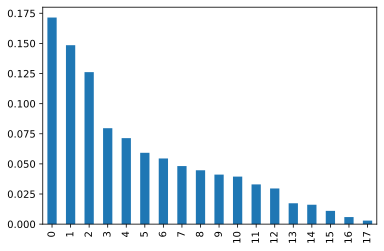

In [354]:
pca = PCA(random_state=100)
pca.fit(X_train_scaled)
a = pca.explained_variance_ratio_
b = pd.Series(a)
b.plot(kind='bar')

In [355]:
np.sum(pca.explained_variance_ratio_[:13])

0.9467556574879838

In [356]:
# Оставим только 13 главных компонент
pca = PCA(n_components=13, random_state=100)
X_train_mc = pca.fit_transform(X_train_scaled)
X_valid_mc = pca.transform(X_valid_scaled)

2. Сделайте кластеризацию на тренировочном наборе данных. Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.

In [357]:
from sklearn.cluster import KMeans

In [358]:
kmeans = KMeans(n_clusters=5, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

1    1594
3    1135
2     923
0     872
4     180
dtype: int64

In [359]:
labels_train

array([1, 1, 2, ..., 3, 1, 2])

In [360]:
X_train_scaled['labels_train'] = labels_train

In [361]:
X_train_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,labels_train
0,0.453332,2.426102,2.236101,1.860892,1.842382,0.407184,1.587424,105.948555,0.288807,1.595990,1.455250,0.178791,1.488903,0.000000,0.956840,8.699439,5.212784,4.036534,1
1,1.813327,1.213051,2.006782,1.248338,1.579184,0.203592,0.881902,105.894610,0.051114,1.915188,1.401676,0.000000,0.765187,3.958124,1.435261,8.699439,5.212784,4.036534,1
2,0.993012,1.213051,2.021420,1.591689,1.579184,1.832328,1.587424,106.272227,0.000000,3.000461,3.001999,0.000000,1.358356,1.979062,1.196051,8.699439,5.212784,4.036534,2
3,0.561268,3.639153,3.580619,3.385957,2.368777,1.425144,2.116566,106.110391,0.000000,2.298225,1.780672,0.119194,3.169892,0.000000,0.478420,8.699439,5.212784,4.036534,0
4,1.424757,2.426102,3.106608,2.458722,1.579184,0.814368,0.881902,105.409102,1.362586,1.979027,1.859176,0.297985,5.348007,1.979062,1.674471,8.699439,0.000000,4.036534,4


In [362]:
labels_valid = kmeans.fit_predict(X_valid_scaled)
pd.value_counts(labels_valid)

1    807
4    485
2    388
0    253
3     83
dtype: int64

In [363]:
X_valid_scaled['labels_valid'] = labels_valid

In [364]:
model = RandomForestRegressor(max_depth=6, max_features=5, n_estimators=40, random_state=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_valid_scaled)
r2_score(y_valid, y_pred)

0.6153372242204549

#### Вывод:
Метрика R2 почему-то стала ниже. Пробовал также 3 кластера и не стандартизированые данные использовать, результат все равно ниже. Возможно, нужно избавиться от ненужных признаков.

#### Попробуем применить к модель бустинг к нашим данным

In [366]:
from sklearn.ensemble import GradientBoostingRegressor

In [421]:
gb = GradientBoostingRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_leaf=20,
                              random_state=42,
                              n_estimators=50)

##### Сначала без метки кластера

In [422]:
X_train_scaled_1 = X_train_scaled.drop('labels_train', axis=1)

In [423]:
X_valid_scaled_1 = X_valid_scaled.drop('labels_valid', axis=1)

In [424]:
gb.fit(X_train_scaled_1, y_train)
y_train_preds = gb.predict(X_train_scaled_1)
r2_score(y_train, y_train_preds)

0.7800623862159395

In [425]:
y_valid_preds = gb.predict(X_valid_scaled_1)
r2_score(y_valid, y_valid_preds)

0.6744739661271655

##### Теперь с меткой кластера

In [426]:
gb.fit(X_train_scaled, y_train)
y_train_preds = gb.predict(X_train_scaled)
r2_score(y_train, y_train_preds)

0.7820019231712824

In [429]:
y_valid_preds = gb.predict(X_valid_scaled)
r2_score(y_valid, y_valid_preds)

0.6735445168911157

#### Вывод:
На тренировочных данных метрика немного улучшилась, а на валидационных снизилась.